In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as msno


df=pd.read_csv('train.csv')

# Context

In [8]:
display(df.head())
print(df.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


(100000, 12)


Ok, dataset all in all have a 100000 rows and 12 columns. Every row correspond to a person, and column is a feature. 
Ok, lest go throug features description on the kaggle dataset and also get some dataframe info.

In [65]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB
None


So, after proper analysis we could get those feature description.
|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **PassengerId** | Passenger ID | Int | Quantative |
| **Survival** |Binary characteristics of survival (0 = No, 1 = Yes) | Binary | Categorical/Binary |
| **pclass** | A proxy for socio-economic status (SES) -1st = Upper 2nd = Middle 3rd = Lower| Numerical | Categorical |
| **Name** | Name and surname | String | Categorical |
| **Sex** | Sex | String, "male"/"female" | Categorical/Binary |
| **Age** | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 | Float | Quantitative |
| **SibSp** | # of siblings / spouses aboard the Titanic | Numerical | Categorical |
| **Parch** | # of parents / children aboard the Titanic | Numerical | Categorical |
| **Ticket** | Ticket number  | String | Quantitative |
| **Fare** | Passenger fare | Float | Quantitative |
| **Cabin** | 	Cabin number | Numerical | Quantitative |
| **Embarked** | Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton | String | Categorical |

There is several things that makes us curious from the dataframe context. If PassengerId column even informative? Seems not, its just a way of indexin a dataframe, so it could be ignored. Also, ticket value is a string, but it could be an important integer value in that string wich could correspond with cabin number, and owerall placement aboard that could be connected with the survival rate.

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [9]:
df.describe(include=["object", "bool"])

,Name,Sex,Ticket,Cabin,Embarked
count,100000,100000,95377,32134,99750
unique,92144,2,75331,26992,3
top,"Johnson, John",male,A/5,C19828,S
freq,31,56114,602,6,72139


# Data quality assessment

Just to get a quick overwiew of the patterns in data completion lets use msno package.

<AxesSubplot:>

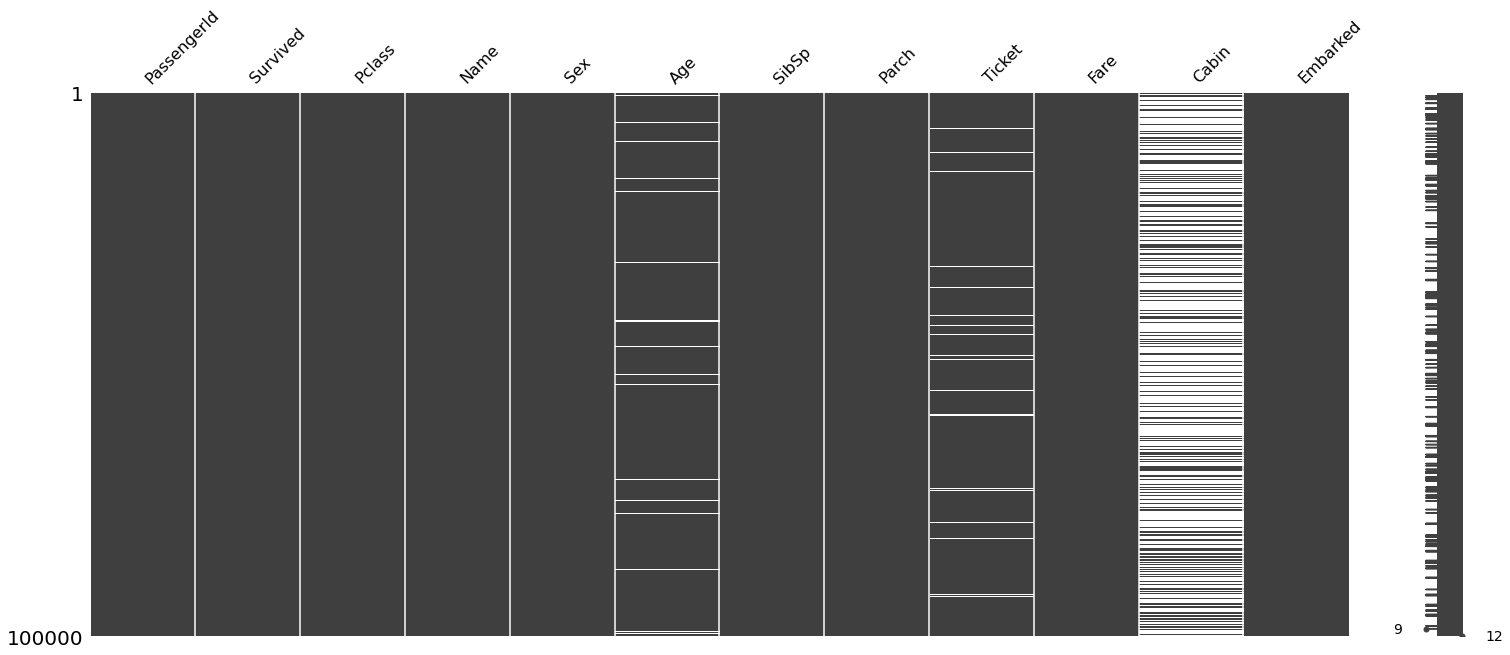

In [5]:
msno.matrix(df)

There are age and ticket column with several missing values and cabin column with a lot of missed values. Lets explore it with the numerical methods and get exact numbers

In [6]:
pd.isna(df).sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

There are overall 3262 missing Age values, 134 missing Fare, 67866 NAs in Cabin variable, 4623 in ticket variable and 250 in Embarked variable. It seems that all variables exept cabin variable has a low proportion of missing variable.


<AxesSubplot:>

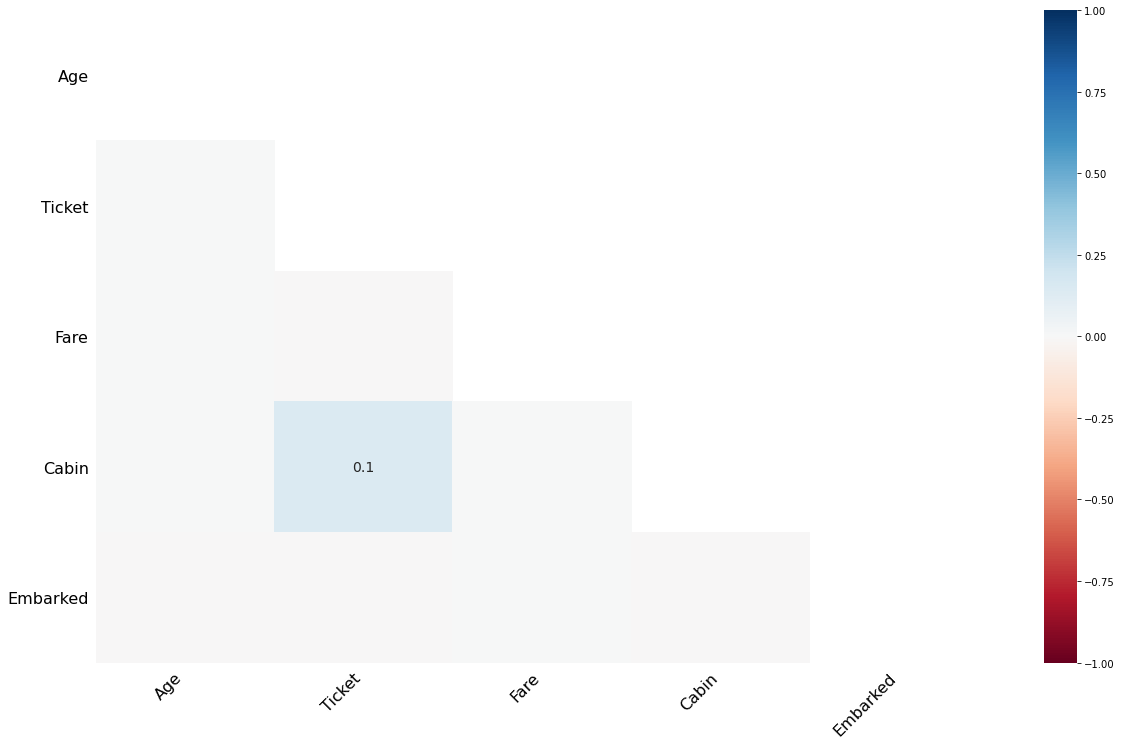

In [11]:
msno.heatmap(df)

# Data exploration

Let's calculate and visualise distribution of our target variable - 'Survived'.

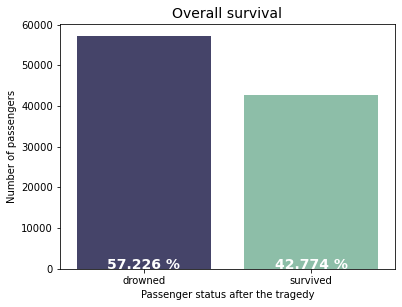

In [35]:

# set size of the plot
plt.figure(figsize=(6, 4.5)) 

# countplot shows the counts of observations in each categorical bin using bars.
# x - name of the categorical variable
ax = sns.countplot(x = 'Survived', data = df, palette=["#3f3e6fd1", "#85c6a9"])

# set the current tick locations and labels of the x-axis.
plt.xticks( np.arange(2), ['drowned', 'survived'] )
# set title
plt.title('Overall survival',fontsize= 14)
# set x label
plt.xlabel('Passenger status after the tragedy')
# set y label
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (df['Survived'].value_counts()/100000*100)
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v, str(v)+' %', horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    


We have 891 passengers in train dataset, (57,2%) of them drowned and only  (42,8%) survived.


% of women survived:  0.7115253155903933
% of men survived:    0.20579534519014864


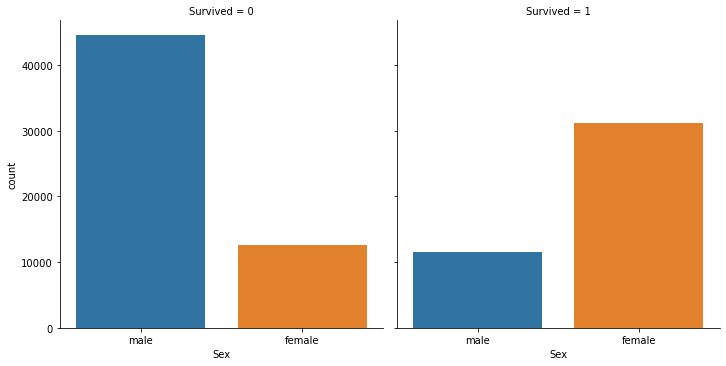

In [38]:
df.groupby(['Survived','Sex'])['Survived'].count()
sns.catplot(x='Sex', col='Survived', kind='count', data=df)
for i, v in enumerate(labels):
    ax.text(i, v-40, str(v)+' %', horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
print("% of women survived: " , df[df.Sex == 'female'].Survived.sum()/df[df.Sex == 'female'].Survived.count())
print("% of men survived:   " , df[df.Sex == 'male'].Survived.sum()/df[df.Sex == 'male'].Survived.count())

Women were more likely to survive than men

74 % of women survived but only 19% of men (in training set)

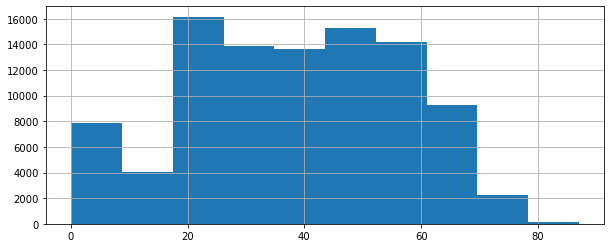

In [45]:
features = ["Total day minutes", "Total intl calls"]
df['Age'].hist(figsize=(10, 4));

C:\Users\u.username\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,count,mean,std,min,25%,50%,75%,max
Age,96708.0,38.355472,18.313556,0.08,25.0,39.0,53.0,87.0


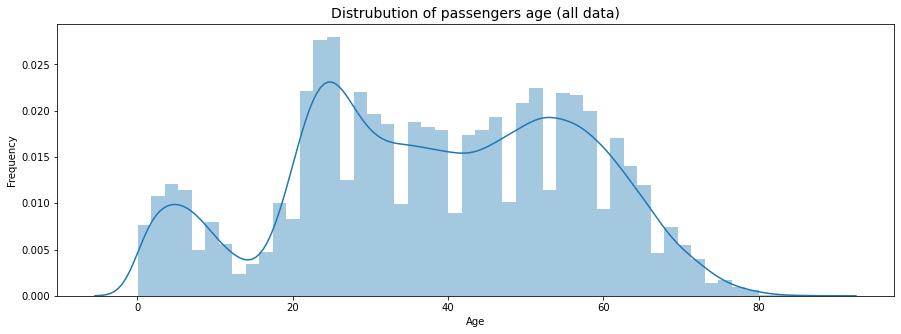

In [53]:
plt.figure(figsize=(15, 5))
sns.distplot(df["Age"])
plt.title('Distrubution of passengers age (all data)',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
age_distr = pd.DataFrame(df['Age'].describe())
# Transpose index and columns.
age_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,55290.0,36.708695,17.809058,0.08,24.0,36.0,52.0,83.0
1,41418.0,40.553799,18.742172,0.08,27.0,43.0,55.0,87.0


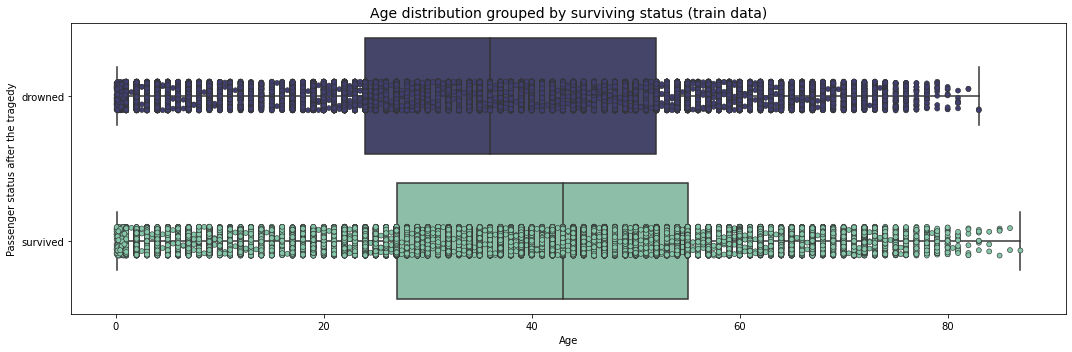

In [58]:
plt.figure(figsize=(15, 5))

# Draw a box plot to show Age distributions with respect to survival status.
sns.boxplot(y = 'Survived', x = 'Age', data =df,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

# Add a scatterplot for each category.
sns.stripplot(y = 'Survived', x = 'Age', data =df,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)',fontsize= 14)
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout()
pd.DataFrame(df.groupby('Survived')['Age'].describe())

The distribution of Age is slightly right skewed. The Age vary from about 0.08 year to 87 years with mean = 38.36.
It looks like there is a slightly bigger chance to survive for younger people.The mean age of survived passenger is 40.56 which on 2.36 higher than the mean age of drowned passengers.It looks like there is a slightly bigger chance to survive for older people.

C:\Users\u.username\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of passengers')

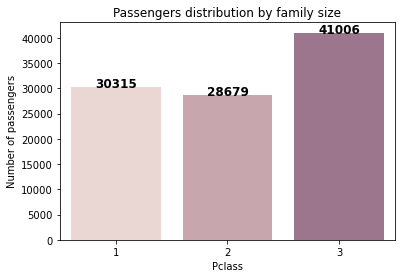

In [64]:
ax = sns.countplot(df['Pclass'], palette = ['#eed4d0', '#cda0aa', '#a2708e'])
# calculate passengers for each category
labels = (df['Pclass'].value_counts(sort = False))
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+2, str(v), horizontalalignment = 'center', size = 12, color = 'black', fontweight = 'bold')
    
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')

C:\Users\u.username\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '9')])

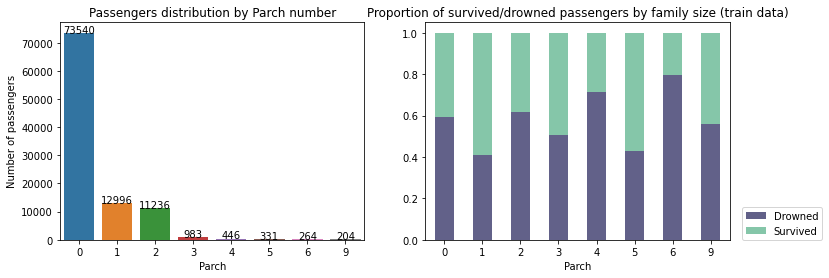

In [62]:

fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(df['Parch'], ax = ax1)

# calculate passengers for each category
labels = (df['Parch'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Passengers distribution by Parch number')
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(122)
d = df.groupby('Parch')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of survived/drowned passengers by family size (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)


C:\Users\u.username\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '8')])

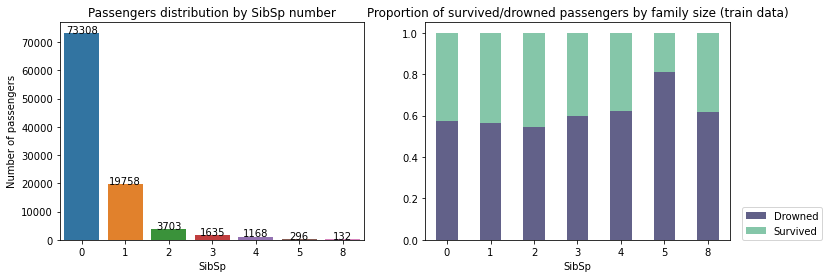

In [66]:

fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(df['SibSp'], ax = ax1)

# calculate passengers for each category
labels = (df['SibSp'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Passengers distribution by SibSp number')
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(122)
d = df.groupby('SibSp')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of survived/drowned passengers by family size (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)


Most of the passengers travelled without siblings and parches. But survival 

# Summary